In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../../Dataset/GermanCreditDataset.csv")


In [4]:
df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [33]:
category_columns = []

for col in df.drop(columns = "default", axis = 1).columns:
    if df[col].dtype == "object":
        category_columns.append(col)

In [59]:
for i in range(0, len(category_columns)):
    print(df[category_columns[i]].value_counts(normalize = True) * 100)
    print()

checking_balance
unknown       39.4
< 0 DM        27.4
1 - 200 DM    26.9
> 200 DM       6.3
Name: proportion, dtype: float64

credit_history
good         53.0
critical     29.3
poor          8.8
very good     4.9
perfect       4.0
Name: proportion, dtype: float64

purpose
furniture/appliances    47.3
car                     34.9
business                 9.7
education                5.9
renovations              2.2
Name: proportion, dtype: float64

savings_balance
< 100 DM         60.3
unknown          18.3
100 - 500 DM     10.3
500 - 1000 DM     6.3
> 1000 DM         4.8
Name: proportion, dtype: float64

employment_duration
1 - 4 years    33.9
> 7 years      25.3
4 - 7 years    17.4
< 1 year       17.2
unemployed      6.2
Name: proportion, dtype: float64

other_credit
none     81.4
bank     13.9
store     4.7
Name: proportion, dtype: float64

housing
own      71.3
rent     17.9
other    10.8
Name: proportion, dtype: float64

job
skilled       63.0
unskilled     20.0
management    14.8

In [46]:
# Replacing car0 with car
df["purpose"].replace("car0", "car", inplace = True)

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_11584\3721793829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["purpose"].replace("car0", "car", inplace = True)


In [49]:
# Create new data
data = df.copy()

In [ ]:
# Will do hot encoding to convert categorical data into Numerical Data
df_encoded = pd.get_dummies(df, columns = category_columns, drop_first = False)


In [54]:
category_columns

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone']

In [55]:
df["default"].replace(["yes", "no"], [1, 0], inplace = True)

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_11584\475654969.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["default"].replace(["yes", "no"], [1, 0], inplace = True)


In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   months_loan_duration             1000 non-null   int64 
 1   amount                           1000 non-null   int64 
 2   percent_of_income                1000 non-null   int64 
 3   years_at_residence               1000 non-null   int64 
 4   age                              1000 non-null   int64 
 5   existing_loans_count             1000 non-null   int64 
 6   dependents                       1000 non-null   int64 
 7   default                          1000 non-null   object
 8   checking_balance_1 - 200 DM      1000 non-null   bool  
 9   checking_balance_< 0 DM          1000 non-null   bool  
 10  checking_balance_> 200 DM        1000 non-null   bool  
 11  checking_balance_unknown         1000 non-null   bool  
 12  credit_history_critical          10

## Train Test Split

In [61]:
X = df_encoded.drop(columns = "default", axis = 1)
Y = df_encoded[["default"]]

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1) 

In [70]:
x_train.shape, x_test.shape

((700, 43), (300, 43))

## Builiding DecisionTree Model

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [95]:
dt_model = DecisionTreeClassifier() 

In [96]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def evaluate_model(model, x, y, evalType):
    print(f"\t\t---------------- {evalType} -------------- ")
    y_predict = model.predict(x)

    Acc_test = print(f"The accuracy of the model is {model.score(x,y)}")

    CM_test = print(sns.heatmap((metrics.confusion_matrix(y, y_predict)), annot = True, fmt='.5g', cmap='Blues'))
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(y,y_predict))

    probs = model.predict_proba(x)
    probs = probs[:, 1]
    auc_test = roc_auc_score(y, probs)
    
    return Acc_test,CM_test,CR_test,auc_test 

		---------------- Train Data -------------- 
The accuracy of the model is 1.0
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       486
         yes       1.00      1.00      1.00       214

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



(None, None, None, 1.0)

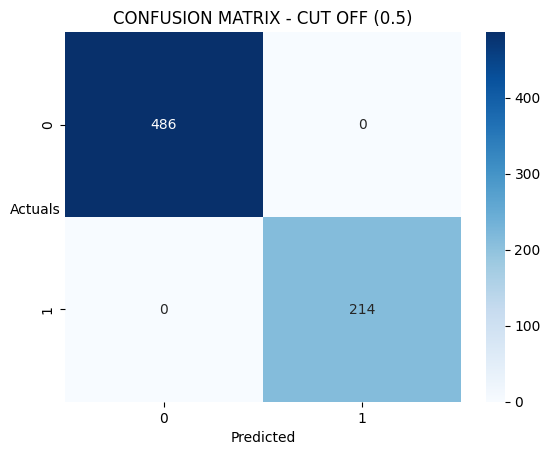

In [98]:
evaluate_model(dt_model, x_train, y_train, "Train Data")

		---------------- Test Data -------------- 
The accuracy of the model is 0.6933333333333334
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.77      0.81      0.79       214
         yes       0.46      0.41      0.43        86

    accuracy                           0.69       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.68      0.69      0.69       300



(None, None, None, 0.6076939795696589)

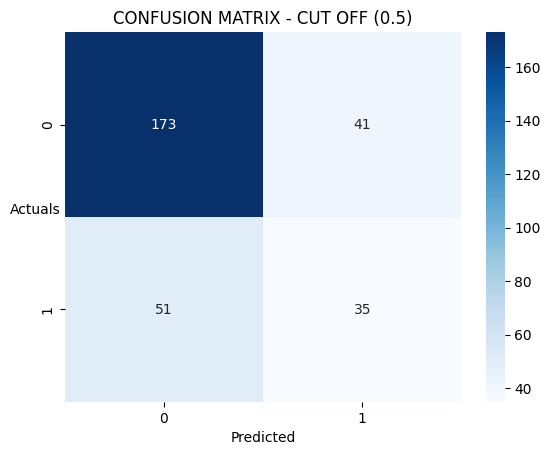

In [99]:
evaluate_model(dt_model, x_test, y_test, "Test Data")

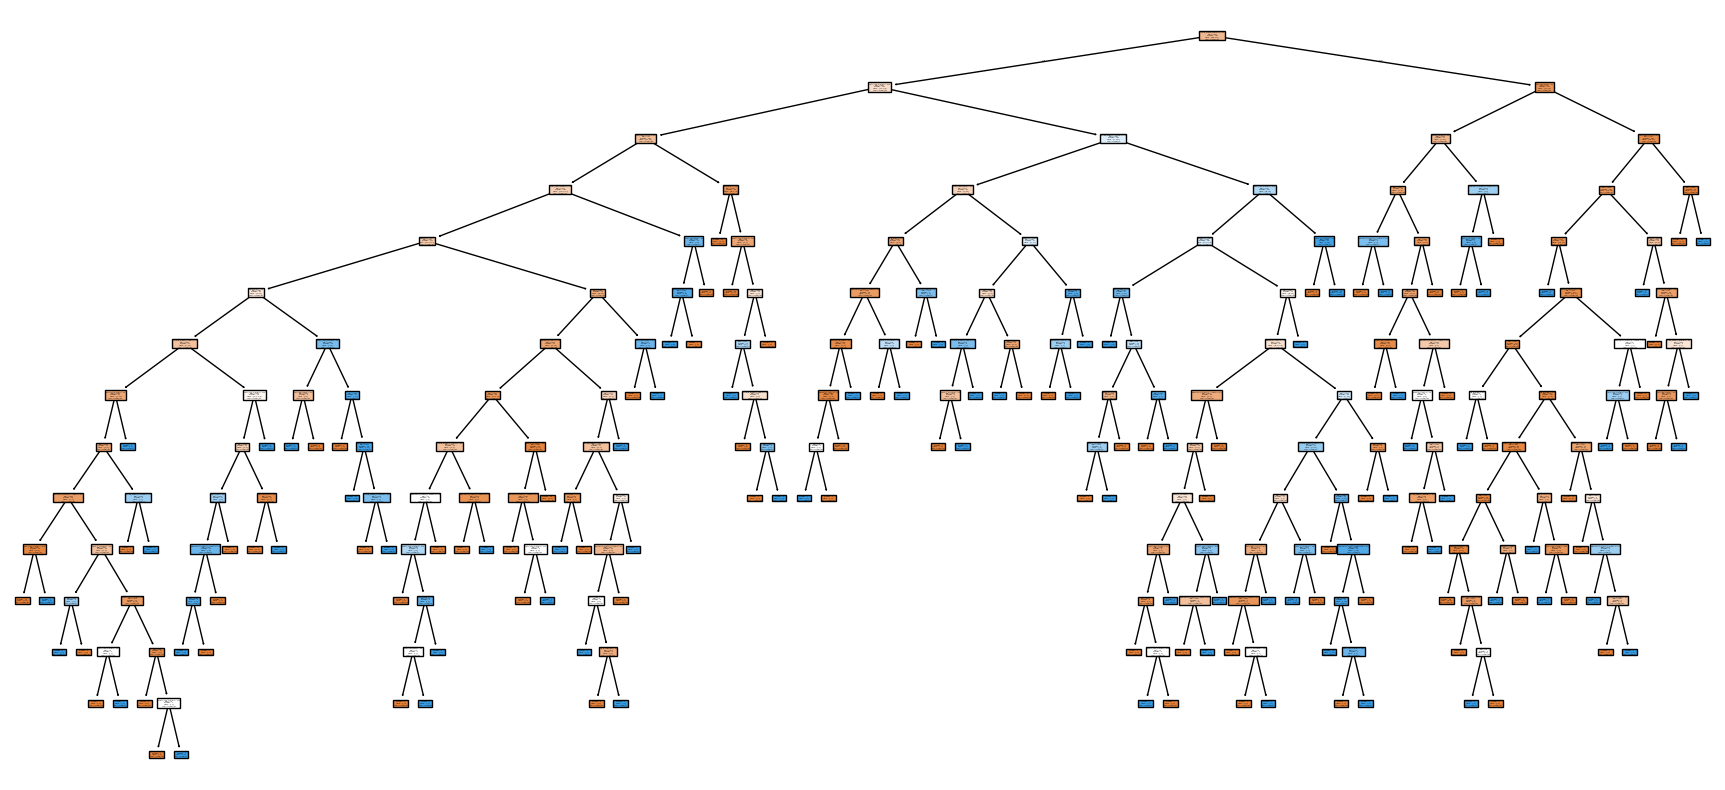

In [100]:
# We can see the model is overfitted
# Let's see the actual tree

plt.figure(figsize = [22, 10])
plot_tree(dt_model, feature_names = X.columns, class_names = ["Default_Yes", "Default_No"], filled = True)
plt.show()